# ELEC0134 - Applied Machine Learning Systems Assignment 22-23
## A1: Smile Detection

*Note preprocessing step is skipped as preprocessing was completed in SVM notebook.

In [1]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [2]:
# Loading in training and test data from npy files
X_train = np.load('all_features_train.npy')
y_train = np.load('smile_labels_train.npy')

X_test = np.load('all_features_test.npy')
y_test = np.load('smile_labels_test.npy')

In [3]:
print('features_train: ', X_train.shape)
print('features_test: ', X_test.shape)
print('labels_train: ', y_train.shape)
print('labels_test: ', y_test.shape)

features_train:  (4798, 136)
features_test:  (970, 136)
labels_train:  (4798,)
labels_test:  (970,)


In [13]:
param_grid = {'n_estimators': [50, 100, 150, 200],
              'max_depth': [2, 4, 6, 8, 10, 12]}


# rfm = random forest model
rfm = RandomForestClassifier()
grid_search = GridSearchCV(rfm, param_grid, verbose = 3, cv = 20)
grid_search.fit(X_train, y_train)

Fitting 20 folds for each of 20 candidates, totalling 400 fits
[CV 1/20] END .....max_depth=2, n_estimators=50;, score=0.904 total time=   0.5s
[CV 2/20] END .....max_depth=2, n_estimators=50;, score=0.846 total time=   0.4s
[CV 3/20] END .....max_depth=2, n_estimators=50;, score=0.867 total time=   0.4s
[CV 4/20] END .....max_depth=2, n_estimators=50;, score=0.863 total time=   0.4s
[CV 5/20] END .....max_depth=2, n_estimators=50;, score=0.879 total time=   0.4s
[CV 6/20] END .....max_depth=2, n_estimators=50;, score=0.842 total time=   0.4s
[CV 7/20] END .....max_depth=2, n_estimators=50;, score=0.892 total time=   0.4s
[CV 8/20] END .....max_depth=2, n_estimators=50;, score=0.879 total time=   0.4s
[CV 9/20] END .....max_depth=2, n_estimators=50;, score=0.892 total time=   0.4s
[CV 10/20] END ....max_depth=2, n_estimators=50;, score=0.871 total time=   0.3s
[CV 11/20] END ....max_depth=2, n_estimators=50;, score=0.875 total time=   0.4s
[CV 12/20] END ....max_depth=2, n_estimators=5

In [5]:
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'max_depth': 8, 'n_estimators': 150}
Best score:  0.8874547668754349


In [7]:
rfm = RandomForestClassifier(**grid_search.best_params_)

In [8]:
rfm.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=150)

In [9]:
y_pred = rfm.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.8989690721649485


In [11]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[432  41]
 [ 57 440]]


In [24]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

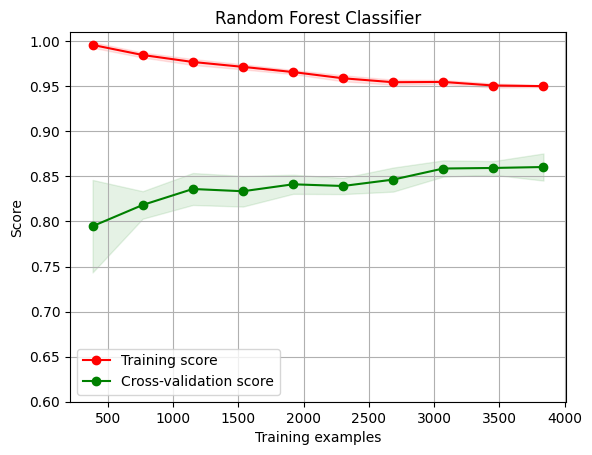

In [25]:
train_sizes, train_scores, test_scores = learning_curve(rfm, X_train, y_train, cv=5, n_jobs=-1, 
                                                       train_sizes=np.linspace(0.1, 1.0, 10), 
                                                       scoring='accuracy')

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Random Forest Classifier")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.ylim((0.6, 1.01))
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()